Remember that you need to get the email address from the JSON key and add that as a user in the Google Sheet
pulling-crm-data-to-master-dat@dealer-world-data.iam.gserviceaccount.com

In [1]:
import pandas as pd
import gspread
from oauth2client.service_account import ServiceAccountCredentials
from pprint import pprint
from datetime import datetime
import matplotlib.pyplot as plt
#%matplotlib inline

scope = ["https://spreadsheets.google.com/feeds",
         "https://www.googleapis.com/auth/spreadsheets",
         "https://www.googleapis.com/auth/drive.file",
         "https://www.googleapis.com/auth/drive"]

creds = ServiceAccountCredentials.from_json_keyfile_name("dealer-world-data-16192d1e4c48.json", scope)
gc = gspread.authorize(creds)

client_list_original = gc.open_by_key('1_j31PwyFsTx0SPBIywvnOd7E3UbjUCFfAFIZkCOMr1g').sheet1.get_all_records()
ids = pd.DataFrame(client_list_original)
client_list = ids['Dealer Leads ID'].tolist()
print(client_list)



['1tnm4krKZK9KUuz_a0bCQ9I_TgCHQcewWIRh-9XY0JX4', '1pIFLDQjh3ArwsjGqZjbvC0eIRW2iDImv_2JiLyJG6ic', '1FY04jn-lE9rDSzUVHw41X-ZMm4Ao5bOQlFD-cnJVdKk', '1qJuX5Id_Aa5yBbbTXK7Qh9EejPZrYMVzzL-6hmm1HSI', '1ZjkqCzsJTgW5zBsBejf3PTkC_XR0dlscsTKkx7m9KB4', '1m40fVBOfzqqHJKK6sNhq8WGGxBdz3-5-apRUAfyWEdQ', '1EDl6blIaMbNkIm_vDh1fR4PFzxAbtmFx4wLjtTxrcjc', '1tmuvd-bWaEe-w6HSeEoS6-aJR19LbVXC6k5ioDKiXPk', '1OXCLC7_CId-g9gJGkWYNp2YGq1NdNOvSz3tl5Uu8zW4', '1vN5LKlordmU6PFMD8Ed8smT55CvN1VsvPRNZF6pVD64', '13Ag1u9ofQfF0-ZLDJRSFH2iFJLQJdDDF5S2Eu-PM1aE', '1lFUu-MzT4207SyTtRp3ncY7F0klWSFMtDRdnAjNvWC0', '1mj0R5TYIIZXa4_gCeq9mrgGQdskTP8HZl3z68zuXCCc', '1W2o2ctcZO9zfU63bnZ-praGcu2ZInhoxJ41hBw__cSY', '1QHRm7NJGoNzWvUYU9rl22JUsVBj-SyUPG7dohtftMc4', '1JLVWIC5bT_JOI5TsBO1Q8qx0c2A-TghmKbfTTMdmfjQ', '1IfU18GtoLFBHL6QWMdBR9XMc9VYM32bq-0IvrDmOf8A', '1cgt1U0zZHhZ_w4UIPmpleci3mxcdpTJMSKLc_i5nZpY', '1uhbpAi2UcTP-wTQCO8o5DhdKOhKJ0cnPAFCZ_ENei1w', '18pW__YqidJBu0dqT0U0oTHTWV0oLqXnqj2FokjrE3V0', '1I2BO14HHz5Mzkvt6L9CGMy6WBpV6iqpCqbLTm

In [2]:
master_df = pd.DataFrame()

for i in range(len(client_list)):
    try:
        sheet = gc.open_by_key(client_list[i]).worksheet("Dealer Leads")
        data = sheet.get_all_records()
        df = pd.DataFrame(data)
        master_df = master_df.append(df, ignore_index=True, sort=True)
    except:
        print(ids[ids['Dealer Leads ID'] == client_list[i]][['Client']]+' did not import correctly')

In [3]:
#Dropping Empty Columns
master_df.drop(columns={''}, inplace=True)

In [4]:
master_df.dtypes

Avg. Response Time    object
Closing Percent       object
DealerName            object
Entry Date            object
Fresh Walk Ins        object
Internet Leads        object
Internet Set          object
Internet Show         object
Internet Sold         object
Phone Leads           object
Phone Set             object
Phone Show            object
Phone Sold            object
Showroom Visits       object
Units Sold            object
dtype: object

In [5]:
#Closing to Float
master_df['Closing Percent'] = master_df['Closing Percent'].replace('#DIV/0!','NaN').replace('','NaN').astype(float)

In [6]:
#Avg. Response Time to Float
master_df['Avg. Response Time'] = master_df['Avg. Response Time'].replace('','NaN').astype(float)

In [7]:
def str_to_int(column):
    master_df[column] = master_df[column].replace(' ','').replace('','0').astype(int)
    
int_columns = ['Fresh Walk Ins',
               'Internet Leads',
               'Internet Set',
               'Internet Show',
               'Internet Sold',
               'Phone Leads',
               'Phone Set',
               'Phone Show',
               'Phone Sold',
               'Showroom Visits',
               'Units Sold',
              ]

for i in int_columns:
    str_to_int(i)

In [8]:
master_df['Entry Date'] = pd.to_datetime(master_df['Entry Date'])

In [9]:
print("We have been tracking CRM info for "+str((master_df['Entry Date'].max() - master_df['Entry Date'].min()).days)+" days.")

We have been tracking CRM info for 378 days.


In [10]:
#Adding Month Column for Grouping
master_df['Month'] = master_df['Entry Date'].dt.to_period('M')

In [11]:
master_df

,Avg. Response Time,Closing Percent,DealerName,Entry Date,Fresh Walk Ins,Internet Leads,Internet Set,Internet Show,Internet Sold,Phone Leads,Phone Set,Phone Show,Phone Sold,Showroom Visits,Units Sold,Month
0,49.2200,0.3333,Abeloff Buick GMC,2019-01-07,19,53,7,4,3,30,7,7,6,42,14,2019-01
1,12.5200,0.2545,Abeloff Buick GMC,2019-01-14,30,56,7,4,3,42,8,6,4,55,14,2019-01
2,10.5400,0.3878,Abeloff Buick GMC,2019-01-21,19,67,15,11,2,41,7,5,4,49,19,2019-01
3,12.0600,0.3175,Abeloff Buick GMC,2019-01-28,22,57,17,13,10,28,12,12,7,63,20,2019-01
4,43.3800,0.5323,Abeloff Buick GMC,2019-02-04,21,78,21,17,15,26,4,3,7,62,33,2019-02
5,12.5700,0.2414,Abeloff Buick GMC,2019-02-11,45,78,26,15,8,23,5,3,3,87,21,2019-02
6,24.2200,0.4386,Abeloff Buick GMC,2019-02-18,23,96,32,15,10,24,9,5,7,57,25,2019-02
7,92.0000,0.3895,Abeloff Buick GMC,2019-02-25,42,110,28,15,12,33,12,8,6,95,37,2019-02
8,53.4300,0.4324,Abeloff Buick GMC,2019-03-04,27,88,31,18,9,59,16,10,10,74,32,2019-03
9,11.3900,0.3433,Abeloff Buick GMC,2019-03-11,32,93,25,14,7,68,13,10,4,67,23,2019-03


In [12]:
#Dropping empty rows
master_df['zero_sum'] = master_df[int_columns].sum(axis=1)
master_df = master_df[master_df['zero_sum'] > 10]
master_df.drop(columns={'zero_sum'}, inplace=True)
master_df

/Users/garrettscott/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Avg. Response Time,Closing Percent,DealerName,Entry Date,Fresh Walk Ins,Internet Leads,Internet Set,Internet Show,Internet Sold,Phone Leads,Phone Set,Phone Show,Phone Sold,Showroom Visits,Units Sold,Month
0,49.2200,0.3333,Abeloff Buick GMC,2019-01-07,19,53,7,4,3,30,7,7,6,42,14,2019-01
1,12.5200,0.2545,Abeloff Buick GMC,2019-01-14,30,56,7,4,3,42,8,6,4,55,14,2019-01
2,10.5400,0.3878,Abeloff Buick GMC,2019-01-21,19,67,15,11,2,41,7,5,4,49,19,2019-01
3,12.0600,0.3175,Abeloff Buick GMC,2019-01-28,22,57,17,13,10,28,12,12,7,63,20,2019-01
4,43.3800,0.5323,Abeloff Buick GMC,2019-02-04,21,78,21,17,15,26,4,3,7,62,33,2019-02
5,12.5700,0.2414,Abeloff Buick GMC,2019-02-11,45,78,26,15,8,23,5,3,3,87,21,2019-02
6,24.2200,0.4386,Abeloff Buick GMC,2019-02-18,23,96,32,15,10,24,9,5,7,57,25,2019-02
7,92.0000,0.3895,Abeloff Buick GMC,2019-02-25,42,110,28,15,12,33,12,8,6,95,37,2019-02
8,53.4300,0.4324,Abeloff Buick GMC,2019-03-04,27,88,31,18,9,59,16,10,10,74,32,2019-03
9,11.3900,0.3433,Abeloff Buick GMC,2019-03-11,32,93,25,14,7,68,13,10,4,67,23,2019-03


In [13]:
#Removing Place Holder Rows (All 5's)
master_df = master_df[(master_df['Closing Percent']!= 5) & (master_df['Avg. Response Time']!=5)]

In [14]:
m_sums = master_df.groupby(['DealerName','Month']).sum().drop(columns={'Avg. Response Time','Closing Percent'})

In [15]:
m_means = master_df.groupby(['DealerName','Month']).mean()
m_means = m_means[['Avg. Response Time','Closing Percent']]
#m_means

In [16]:
#Transforming Series to DataFrame
m_totals = m_sums.join(m_means)
m_totals.reset_index(inplace=True)



In [17]:
m_totals['Month'] = m_totals['Month'].astype(str)
m_totals['Month'] = pd.to_datetime(m_totals['Month'])
m_totals.dtypes

DealerName                    object
Month                 datetime64[ns]
Fresh Walk Ins                 int64
Internet Leads                 int64
Internet Set                   int64
Internet Show                  int64
Internet Sold                  int64
Phone Leads                    int64
Phone Set                      int64
Phone Show                     int64
Phone Sold                     int64
Showroom Visits                int64
Units Sold                     int64
Avg. Response Time           float64
Closing Percent              float64
dtype: object

In [18]:
#m_totals = m_totals['Month'].astype(str)
print(type(master_df))
print(type(m_totals))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [71]:
#Removing Current Month from DataFrame
current_month = datetime.now().strftime("%Y-%m-01")
m_totals = m_totals[m_totals['Month'] != current_month

/Users/garrettscott/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Avg Number Units Sold per Dealer')

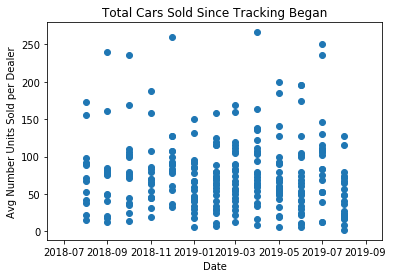

In [20]:
plt.scatter(m_totals['Month'],m_totals['Units Sold']);
plt.title('Total Cars Sold Since Tracking Began');
plt.xlabel('Date')
plt.ylabel('Avg Number Units Sold per Dealer')

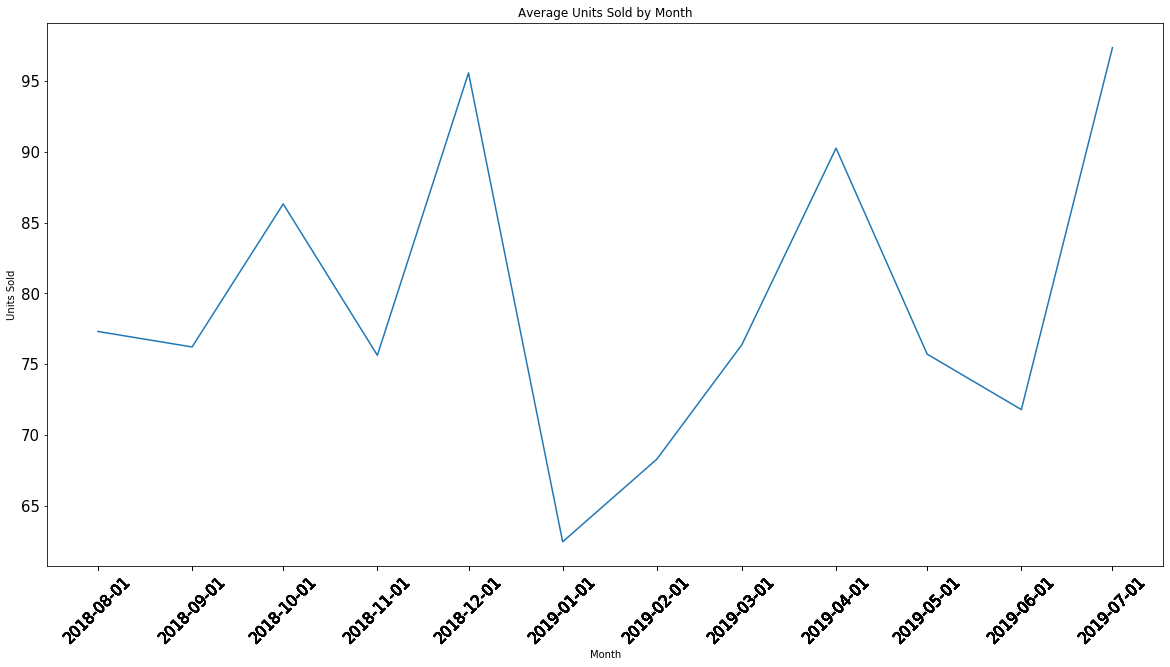

In [101]:
plt.figure(figsize=(20,10))
plt.plot(m_totals.groupby(['Month'])['Units Sold'].mean());
plt.title('Average Units Sold by Month');
plt.xlabel('Month');
plt.ylabel('Units Sold');
plt.xticks(m_totals['Month'], rotation=45);
plt.tick_params(labelsize=15);
plt.savefig("Avg. Cars Sold.png",edgecolor='k')


In [76]:
m_totals.query('Month == "2019-01"')

,DealerName,Month,Fresh Walk Ins,Internet Leads,Internet Set,Internet Show,Internet Sold,Phone Leads,Phone Set,Phone Show,Phone Sold,Showroom Visits,Units Sold,Avg. Response Time,Closing Percent
0,Abeloff Buick GMC,2019-01-01,90,233,46,32,18,141,34,30,21,209,67,21.085000,0.323275
6,Abeloff Nissan,2019-01-01,96,234,65,46,37,66,31,20,12,228,86,68.577500,0.377550
15,Cadillac of Fayetteville,2019-01-01,42,205,43,28,9,14,8,6,1,90,30,29.250000,0.329375
27,Con Paulos,2019-01-01,76,92,43,17,4,54,23,11,4,180,46,126.000000,0.249150
40,Gallagher,2019-01-01,45,163,23,16,8,32,12,8,4,107,47,138.500000,0.432875
54,John Sauder Ephrata,2019-01-01,49,217,40,22,10,2,9,8,2,84,34,37.000000,0.395725
65,John Sauder New Holland,2019-01-01,34,128,34,19,12,13,0,2,2,38,43,128.500000,1.149600
78,Lehigh Valley Acura,2019-01-01,57,273,16,15,8,30,16,17,7,97,40,62.250000,0.417850
91,Lehigh Valley Honda,2019-01-01,138,481,40,32,17,58,33,19,10,216,132,53.000000,0.613450
104,Lehigh Valley Hyundai,2019-01-01,75,216,16,13,8,36,15,6,9,100,59,68.750000,0.578500
